In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import math

In [2]:
iris_data = datasets.load_iris()
X = iris_data.data[:100,:2]
y = iris_data.target[:100]
X_full = iris_data.data[:100, :]
X.shape, y.shape

((100, 2), (100,))

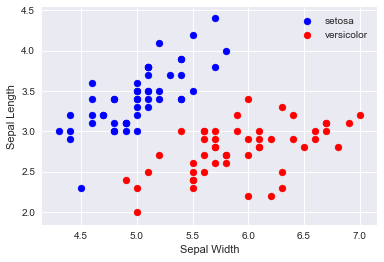

In [3]:
setosa     = plt.scatter(X[:50,0], X[:50, 1], c='b')
versicolor = plt.scatter(X[50:,0], X[50:, 1], c='r')

plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')

plt.legend((setosa,versicolor), ('setosa','versicolor'))
sns.despine()

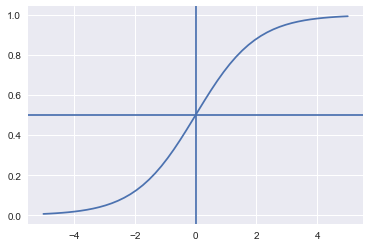

In [4]:
x_   = np.linspace(-5,5, num=50)
y_   = 1.0/(1 + np.exp(-x_))

plt.plot(x_,y_)
plt.axhline(.5)
plt.axvline(.0)
sns.set()

# Binary Data set

X = np.array([[0,0],[1,1],[1,0],[1,1],[0,0],[0,1],[1,0],[1,1],[0,1]]).reshape(9,2) 
y = np.array([0,1,1,1,0,1,1,1,1])

In [5]:
def logistic_fuinction(theta, X):
     return 1.0/(1 + np.exp(- X.dot(theta) ))
    
def log_gradient(theta, X, y):
    output = logistic_fuinction(theta, X)- np.squeeze(y)
    return output.T.dot(X)

def costFunction(theta, X,y, reg=0.001):
    step_1 = np.squeeze(y) * np.log(logistic_fuinction(theta, X))
    step_2 = (1-np.squeeze(y)) * np.log(logistic_fuinction(theta, X))
    final  = -step_1-step_2
    
    regulaization = 0.5 * np.mean(np.sum(theta**2) * reg)
    return np.mean(final)+regulaization

def gradient_descent(theta, X,y, lr = 0.001, convergence = 0.0001):
    X = (X - np.mean(X, axis=0))/np.std(X, axis=0) 
    cost = costFunction(theta, X, y)
    cost_itr = []
    cost_itr.append([0, cost])
    change_cost = 1
    i = 0
    
    while(change_cost > convergence):
        old_cost = cost
        theta = theta - lr*(log_gradient(theta, X, y))
        cost  = costFunction(theta, X, y)
        cost_itr.append([i, cost])
        change_cost = old_cost-cost
        i = i+1
    return theta, np.array(cost_itr)

def perdiction(theta, X, hard=True):
    #normalize
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    pred_prob = logistic_fuinction(theta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    print 
    #if hard:
    #    return pred_value
    return pred_value

In [6]:
theta_dim = X.shape[1]
theta = np.random.normal(0, 0.01, theta_dim)
fitted_values, cost = gradient_descent(theta, X,y)
output = perdiction(fitted_values, X, y)

In [7]:
np.sum(output == y)*1.0/ len(X) * 100

98.0